In [1]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt

In [2]:
#spy=yf.download('spy',period='30d',interval='5m')
#spy

In [3]:
# read the data from the website
# colnames=['Datetime','Open','High','Low','Close','Volume']
# spy=pd.read_csv("SPY_intraday.csv",names=colnames)
# spy.index=pd.to_datetime(spy["Datetime"])
# spy.drop("Datetime",axis=1,inplace=True)

In [80]:
spy=pd.read_csv("SPY_intraday.csv")


In [81]:
spy.index=pd.to_datetime(spy["Datetime"])

In [82]:
spy.drop("Datetime",axis=1,inplace=True)

In [83]:
spy

,Open,High,Low,Close,Volume,hours
Datetime,,,,,,
2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday
2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday
2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday
2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday
2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday
...,...,...,...,...,...,...
2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday
2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday
2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday


In [84]:
#spy=yf.download('spy',start='2022-10-12',end='2022-12-06',interval='5m')
#spy

In [85]:
spy.loc['2022-11-04']

,Open,High,Low,Close,Volume,hours
Datetime,,,,,,
2022-11-04 09:30:00,377.00,377.37,375.7500,375.8400,2107610,intraday
2022-11-04 09:35:00,375.83,376.31,374.9099,375.0750,1272773,intraday
2022-11-04 09:40:00,375.08,375.08,372.8100,372.8400,1422910,intraday
2022-11-04 09:45:00,372.84,373.89,372.2900,372.6100,1483645,intraday
2022-11-04 09:50:00,372.61,373.80,372.2250,373.5800,1219256,intraday
...,...,...,...,...,...,...
2022-11-04 15:35:00,375.35,375.40,374.6500,375.1900,971398,intraday
2022-11-04 15:40:00,375.18,375.86,374.7900,375.8201,1143905,intraday
2022-11-04 15:45:00,375.82,376.41,375.5400,375.6099,1972073,intraday


In [86]:
#spy=spy['2022']

In [87]:
spy

,Open,High,Low,Close,Volume,hours
Datetime,,,,,,
2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday
2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday
2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday
2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday
2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday
...,...,...,...,...,...,...
2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday
2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday
2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday


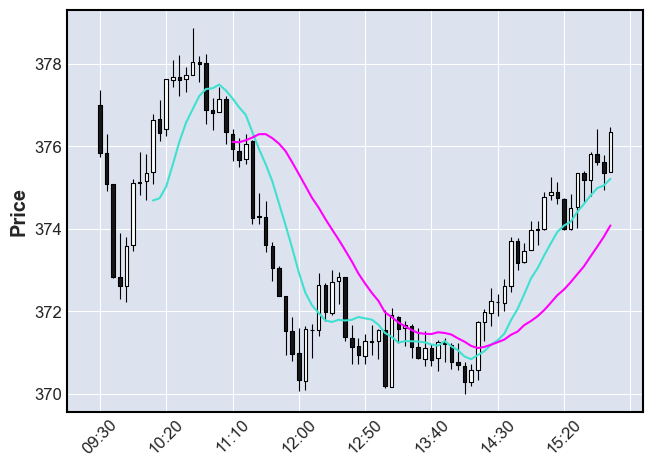

In [88]:
mpf.plot(spy.loc['2022-11-04'],type='candle',mav=(9,21))

In [89]:
spy["adx"]=ta.trend.adx(spy["High"],spy["Low"],spy["Close"])
spy["di_plus"]=ta.trend.adx_neg(spy["High"],spy["Low"],spy["Close"])
spy["di_minus"]=ta.trend.adx_pos(spy["High"],spy["Low"],spy["Close"])
spy["ema_9"]=ta.trend.EMAIndicator(spy["Close"],9).ema_indicator()
spy["ema_21"]=ta.trend.EMAIndicator(spy["Close"],21).ema_indicator()
spy["vwap"]=ta.volume.volume_weighted_average_price(spy["High"],spy["Low"],spy["Close"],spy["Volume"],14)
spy["wma"]=ta.trend.WMAIndicator(spy["Close"]).wma()
spy["atr"]=ta.volatility.AverageTrueRange(spy["High"],spy["Low"],spy["Close"]).average_true_range()

/Users/bikenkc/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/Users/bikenkc/opt/anaconda3/lib/python3.9/site-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [90]:
spy.atr

Datetime
2005-01-03 09:30:00    0.000000
2005-01-03 09:35:00    0.000000
2005-01-03 09:40:00    0.000000
2005-01-03 09:45:00    0.000000
2005-01-03 09:50:00    0.000000
                         ...   
2022-11-25 15:30:00    0.128130
2022-11-25 15:35:00    0.127549
2022-11-25 15:40:00    0.124867
2022-11-25 15:50:00    0.124520
2022-11-25 15:55:00    0.117054
Name: atr, Length: 351269, dtype: float64

In [91]:
spy.di_minus

Datetime
2005-01-03 09:30:00     0.000000
2005-01-03 09:35:00     0.000000
2005-01-03 09:40:00     0.000000
2005-01-03 09:45:00     0.000000
2005-01-03 09:50:00     0.000000
                         ...    
2022-11-25 15:30:00    22.847805
2022-11-25 15:35:00    28.032496
2022-11-25 15:40:00    26.589293
2022-11-25 15:50:00    24.758995
2022-11-25 15:55:00    24.456827
Name: di_minus, Length: 351269, dtype: float64

In [92]:
spy.di_plus

Datetime
2005-01-03 09:30:00     0.000000
2005-01-03 09:35:00     0.000000
2005-01-03 09:40:00     0.000000
2005-01-03 09:45:00     0.000000
2005-01-03 09:50:00     0.000000
                         ...    
2022-11-25 15:30:00    24.638888
2022-11-25 15:35:00    22.983135
2022-11-25 15:40:00    26.948210
2022-11-25 15:50:00    27.387736
2022-11-25 15:55:00    27.053485
Name: di_plus, Length: 351269, dtype: float64

In [93]:
spy.adx

Datetime
2005-01-03 09:30:00     0.000000
2005-01-03 09:35:00     0.000000
2005-01-03 09:40:00     0.000000
2005-01-03 09:45:00     0.000000
2005-01-03 09:50:00     0.000000
                         ...    
2022-11-25 15:30:00    12.345801
2022-11-25 15:35:00    12.170935
2022-11-25 15:40:00    11.349468
2022-11-25 15:50:00    10.898867
2022-11-25 15:55:00    10.480451
Name: adx, Length: 351269, dtype: float64

In [94]:
spy["ema_9"]

Datetime
2005-01-03 09:30:00           NaN
2005-01-03 09:35:00           NaN
2005-01-03 09:40:00           NaN
2005-01-03 09:45:00           NaN
2005-01-03 09:50:00           NaN
                          ...    
2022-11-25 15:30:00    402.410504
2022-11-25 15:35:00    402.424404
2022-11-25 15:40:00    402.417523
2022-11-25 15:50:00    402.404018
2022-11-25 15:55:00    402.397215
Name: ema_9, Length: 351269, dtype: float64

In [95]:
spy["ema_21"]

Datetime
2005-01-03 09:30:00           NaN
2005-01-03 09:35:00           NaN
2005-01-03 09:40:00           NaN
2005-01-03 09:45:00           NaN
2005-01-03 09:50:00           NaN
                          ...    
2022-11-25 15:30:00    402.394261
2022-11-25 15:35:00    402.402055
2022-11-25 15:40:00    402.400959
2022-11-25 15:50:00    402.396327
2022-11-25 15:55:00    402.393933
Name: ema_21, Length: 351269, dtype: float64

In [96]:
spy['vwap']

Datetime
2005-01-03 09:30:00           NaN
2005-01-03 09:35:00           NaN
2005-01-03 09:40:00           NaN
2005-01-03 09:45:00           NaN
2005-01-03 09:50:00           NaN
                          ...    
2022-11-25 15:30:00    402.425357
2022-11-25 15:35:00    402.413434
2022-11-25 15:40:00    402.402561
2022-11-25 15:50:00    402.380470
2022-11-25 15:55:00    402.375420
Name: vwap, Length: 351269, dtype: float64

In [97]:
spy['wma']

Datetime
2005-01-03 09:30:00           NaN
2005-01-03 09:35:00           NaN
2005-01-03 09:40:00           NaN
2005-01-03 09:45:00           NaN
2005-01-03 09:50:00           NaN
                          ...    
2022-11-25 15:30:00    402.410896
2022-11-25 15:35:00    402.428451
2022-11-25 15:40:00    402.424673
2022-11-25 15:50:00    402.411562
2022-11-25 15:55:00    402.401340
Name: wma, Length: 351269, dtype: float64

In [98]:
spy['2022-11-25']["vwap"]

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_43448/1358154109.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  spy['2022-11-25']["vwap"]


Datetime
2022-11-25 09:30:00    402.203249
2022-11-25 09:35:00    402.187223
2022-11-25 09:40:00    402.184807
2022-11-25 09:45:00    402.167895
2022-11-25 09:50:00    402.155604
                          ...    
2022-11-25 15:30:00    402.425357
2022-11-25 15:35:00    402.413434
2022-11-25 15:40:00    402.402561
2022-11-25 15:50:00    402.380470
2022-11-25 15:55:00    402.375420
Name: vwap, Length: 75, dtype: float64

(array([19307.41666667, 19307.45833333, 19307.5       , 19307.54166667,
        19307.58333333, 19307.625     , 19307.66666667]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

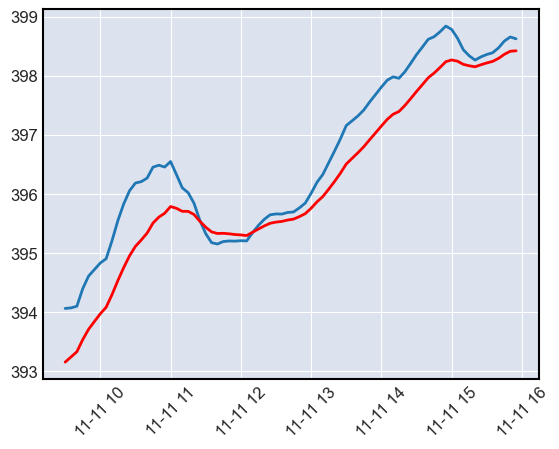

In [99]:
plt.plot(spy.loc["2022-11-11"]["ema_9"])
plt.plot(spy.loc["2022-11-11"]["ema_21"],c='r')
plt.xticks(rotation=45)

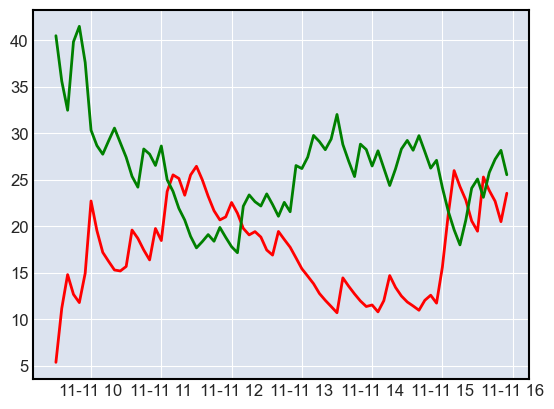

In [100]:
plt.plot(spy.loc["2022-11-11"]["di_plus"],c='r')
plt.plot(spy.loc["2022-11-11"]["di_minus"],c='g')

In [113]:
signal_list=[]
signal=""
return_list=[]
stoploss_list=[]
for i in range(len(spy)):
    if spy.index[i].hour==15 and spy.index[i].minute==55:
        if signal=="Buy Call":
            signal_list.append("Sell")
            signal=""
            return_list.append(spy["Close"][i]-cost)
            stoploss_list.append(0)
        elif signal=="Buy Put":
            signal_list.append("Sell")
            signal=""
            return_list.append(cost-spy["Close"][i])
            stoploss_list.append(0)
        elif signal=="":
            signal_list.append("")
            return_list.append(0)
            stoploss_list.append(0)
    elif signal=="":
        if spy["di_plus"][i]>30 and (spy["ema_9"][i]>spy["ema_21"][i]) and (spy["ema_9"][i]>spy["vwap"][i] and spy["ema_21"][i]>spy["vwap"][i] ):
            signal="Buy Call"
            signal_list.append(signal)
            cost=spy["Close"][i]
            stoploss=cost-spy["atr"][i]
            return_list.append(0)
            stoploss_list.append(stoploss)
            
        elif spy["di_minus"][i]>20 and (spy["ema_21"][i]>spy["ema_9"][i]) and (spy["ema_9"][i]>spy["vwap"][i] and spy["ema_21"][i]>spy["vwap"][i]):
            signal="Buy Put"
            signal_list.append(signal)
            cost=spy["Close"][i]
            stoploss=cost+spy["atr"][i]
            return_list.append(0)
            stoploss_list.append(stoploss)
        else:
            signal_list.append("")
            return_list.append(0)
            stoploss_list.append(0)
    elif signal=="Buy Call":
        #sell signal
        if spy["di_plus"][i]<20:
            signal_list.append("Sell")
            signal=""
            return_list.append(spy["Close"][i]-cost)
            stoploss_list.append(0)
        elif spy["Close"][i]<stoploss:
            signal_list.append("Sell")
            signal=""
            return_list.append(spy["Close"][i]-cost)
            stoploss_list.append(stoploss)
        
        else:
            signal_list.append("")
            return_list.append(0)
            stoploss_list.append(stoploss)

    elif signal=="Buy Put":
        #sell signal
        if spy["di_minus"][i]<20:
            signal_list.append("Sell")
            signal=""
            return_list.append(cost-spy["Close"][i])
            stoploss_list.append(0)
        elif spy["Close"][i]>stoploss:
            signal_list.append("Sell")
            signal=""
            return_list.append(cost-spy["Close"][i])
            stoploss_list.append(stoploss)
        else:
            signal_list.append("")
            return_list.append(0)
            stoploss_list.append(stoploss)

In [114]:
spy["signal"]=signal_list
spy["return"]=return_list
spy["stoploss"]=stoploss_list

In [115]:
spy['cum_return']=spy['return'].cumsum()

In [116]:
spy

,Open,High,Low,Close,Volume,hours,adx,di_plus,di_minus,ema_9,ema_21,vwap,wma,atr,signal,return,stoploss,cum_return
Datetime,,,,,,,,,,,,,,,,,,
2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday,12.345801,24.638888,22.847805,402.410504,402.394261,402.425357,402.410896,0.128130,,0.0,0.0,64.627
2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday,12.170935,22.983135,28.032496,402.424404,402.402055,402.413434,402.428451,0.127549,,0.0,0.0,64.627
2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday,11.349468,26.948210,26.589293,402.417523,402.400959,402.402561,402.424673,0.124867,,0.0,0.0,64.627


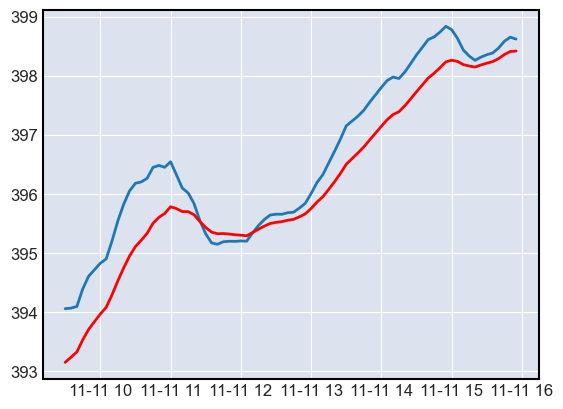

In [117]:
plt.plot(spy.loc["2022-11-11"]["ema_9"])
plt.plot(spy.loc["2022-11-11"]["ema_21"],c='r')

In [118]:
spy.to_csv("ADX_ema_9_21_crossover.csv")

In [119]:
spy

,Open,High,Low,Close,Volume,hours,adx,di_plus,di_minus,ema_9,ema_21,vwap,wma,atr,signal,return,stoploss,cum_return
Datetime,,,,,,,,,,,,,,,,,,
2005-01-03 09:30:00,87.0610,87.1326,87.0109,87.1111,1251700,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:35:00,87.1111,87.2042,87.0968,87.1827,934900,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:40:00,87.1541,87.1684,87.0968,87.1326,865500,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:45:00,87.1326,87.1684,87.0753,87.0968,584700,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
2005-01-03 09:50:00,87.1326,87.1326,87.0180,87.0180,621600,intraday,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 15:30:00,402.3600,402.3600,402.3600,402.3600,100,intraday,12.345801,24.638888,22.847805,402.410504,402.394261,402.425357,402.410896,0.128130,,0.0,0.0,64.627
2022-11-25 15:35:00,402.4800,402.4800,402.4800,402.4800,900,intraday,12.170935,22.983135,28.032496,402.424404,402.402055,402.413434,402.428451,0.127549,,0.0,0.0,64.627
2022-11-25 15:40:00,402.4800,402.4800,402.3900,402.3900,611,intraday,11.349468,26.948210,26.589293,402.417523,402.400959,402.402561,402.424673,0.124867,,0.0,0.0,64.627


<AxesSubplot:xlabel='Datetime'>

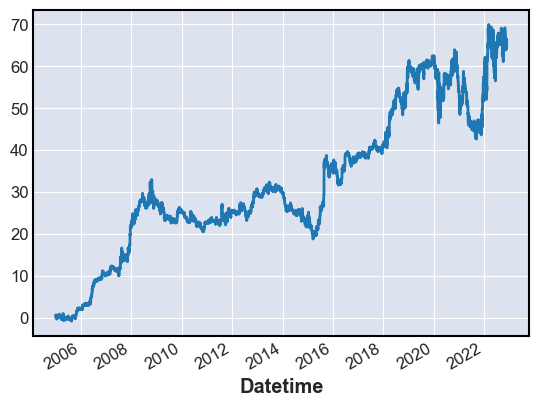

In [120]:
spy["cum_return"].plot()

<AxesSubplot:xlabel='Datetime'>

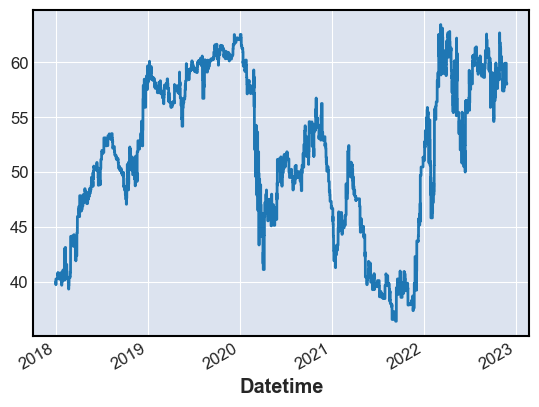

In [112]:
spy.loc['2018':'2022']["cum_return"].plot()